### K均值聚类


In [1]:
import numpy as np
import sys
from matplotlib import pyplot as plt
from scipy import io as sio


def runKmeans(X, initial_centroids, K, max_iter = 1):
    # 随机初始化K个聚类中心，这里根据吴恩达的数据直接指定
    plt.scatter(X[:,0], X[:, 1])
    centroids = initial_centroids

    for _ in range(max_iter):
        idx = findClosestCentroids(X, centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
        # 绘制KMeans聚类中心点移动过程
        plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='x', color='r')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.show()


def findClosestCentroids(X, centroids):
    idx = []
    for _, x in enumerate(X):
        min_distance = sys.maxsize
        min_id = -1
        for j, o in enumerate(centroids):
            distance = np.dot((x - o), (x - o))
            if distance < min_distance:
                min_distance = distance
                min_id = j
        assert(min_id != -1)
        idx.append(min_id)
    return idx


def computeCentroids(X, idx, K=3):
    centroids = np.zeros((K, 2))
    for _id, x in zip(idx, X):
        centroids[_id] += x
    for i in range(K):
        centroids[i] /= np.sum((np.array(idx) == i).astype(np.int32))
    return centroids

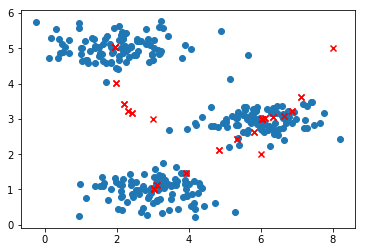

In [2]:
X = sio.loadmat('ex7data2.mat')['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3
runKmeans(X, initial_centroids, K, 10)